In [57]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd
import numpy as np

In [58]:
sub = 'demo'

movement_data = pd.read_csv('../data/data_movements_' + str(sub) + '.csv')

In [59]:
movement_data.loc[movement_data.state == "reach"]

,Unnamed: 0,trial,state,sample,time,x,y
1096,1096,0,reach,1096,18.257514,-0.049708,0.388736
1097,1097,0,reach,1097,18.276188,-0.041524,0.684554
1098,1098,0,reach,1098,18.291077,-0.025736,1.079491
1099,1099,0,reach,1099,18.308072,-0.009059,1.570961
1100,1100,0,reach,1100,18.324102,0.002915,2.169838
...,...,...,...,...,...,...,...
2851,186,6,reach,2857,47.607472,-0.144322,4.755976
2852,187,6,reach,2858,47.624492,-0.113273,5.760361
2853,188,6,reach,2859,47.641456,-0.061345,6.822733
2854,189,6,reach,2860,47.658510,0.005206,7.905151


<Axes: xlabel='x', ylabel='y'>

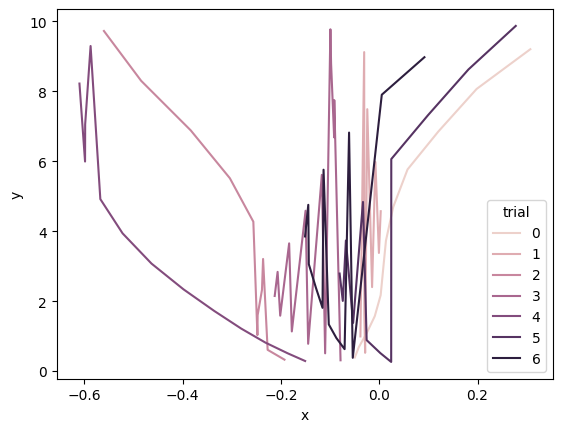

In [60]:
sns.lineplot(data = movement_data.loc[movement_data.state.isin(['reach'])], x = "x", y = "y", hue = "trial")

In [61]:
#Checking that there are 300 reach trials: conclusion = yes
movement_data.loc[(movement_data.trial == 299) & (movement_data.state == 'reach')]

,Unnamed: 0,trial,state,sample,time,x,y


In [62]:
# convert x, y coordinates for 'reach' to polar and add these to the data as columns 
# function inspired from https://stackoverflow.com/questions/20924085/python-conversion-between-coordinates 
def cart2pol(x, y):
    r = []
    theta = []
    for i in range(len(x)): 
        r.append(np.sqrt((x[i])**2 + (y[i])**2))
        theta.append(np.arctan2(y[i], x[i]))
    return(r, theta)

# create new subset of movement data only including reach state 
reach_data = movement_data.loc[movement_data.state == 'reach'].copy()

reach_x = reach_data.loc[(reach_data.state == 'reach'), 'x'].values
reach_y  = reach_data.loc[(reach_data.state == 'reach'), 'y'].values

r, theta = cart2pol(reach_x, reach_y)

In [63]:
# add r and theta to the reach dataset as columns 
reach_data['r'] = r
reach_data['theta'] = theta

In [64]:
reach_data

,Unnamed: 0,trial,state,sample,time,x,y,r,theta
1096,1096,0,reach,1096,18.257514,-0.049708,0.388736,0.391901,1.697977
1097,1097,0,reach,1097,18.276188,-0.041524,0.684554,0.685812,1.631381
1098,1098,0,reach,1098,18.291077,-0.025736,1.079491,1.079797,1.594633
1099,1099,0,reach,1099,18.308072,-0.009059,1.570961,1.570987,1.576563
1100,1100,0,reach,1100,18.324102,0.002915,2.169838,2.169840,1.569453
...,...,...,...,...,...,...,...,...,...
2851,186,6,reach,2857,47.607472,-0.144322,4.755976,4.758165,1.601132
2852,187,6,reach,2858,47.624492,-0.113273,5.760361,5.761474,1.590458
2853,188,6,reach,2859,47.641456,-0.061345,6.822733,6.823009,1.579787
2854,189,6,reach,2860,47.658510,0.005206,7.905151,7.905153,1.570138
